## TECHIN 513 - Basic ML

**Instructions**

Install the required packages (scikit-learn, TensorFlow, Keras, PyTorch, and, pandas) if they are not already installed.

In [110]:
# Task 0: Import necessary packages

import tqdm
import numpy as np
import pandas as pd
import torch as tc
import torchvision as tv
import tensorflow as tf
from tensorflow import keras
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from matplotlib import pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [60]:
# Task 1: Load the Iris dataset

iris = load_iris()
X = iris.data
y = iris.target

In [61]:
# Task 2: Split the data into training and testing sets
# use train_test_split function to split the data with test_size = 0.2 and random_state = 42

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [62]:
# Task 3: Train a Random Forest Classifier on the training data
# import RandomForestClassifier from sklearn and fit it with training data

clf = RandomForestClassifier(random_state=0)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [63]:
# Task 4: Evaluate the classifier on the testing data
# use clf.score function to evaluate the classifier on the testing data
# print the accuracy of the classifier

accuracy = clf.score(X_test, y_test)
print(f"Accuracy of Random Forest Classifier: {accuracy:.2%}")

Accuracy of Random Forest Classifier: 100.00%


In [68]:
# Task 5: Load the MNIST dataset
# use keras.datasets.mnist.load_data() to load the dataset

(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [ ]:
# Task 6: Preprocess the data
# normalize the data by dividing by 255.0
# use to_categorical from keras.utils to one-hot encode the labels

X_train, X_test = X_train/255.0 , X_test/255.0  # normalization
y_train = tf.keras.utils.to_categorical(y_train)  # one-hot encoding vector
y_test = tf.keras.utils.to_categorical(y_test)

num_pixels = 28 * 28  # flatten input vector to square of size of data
X_train = X_train.reshape(X_train.shape[0], num_pixels)  # reshape training data
X_test = X_test.reshape(X_test.shape[0], num_pixels)

In [70]:
# Task 7: Define and train a simple neural network using Keras
# use Sequential model from keras.models
# use Dense layer from keras.layers
# use 'adam' as optimizer and 'categorical_crossentropy' as loss function
# use model.fit to train the model

# define sequential model with keras
model = tf.keras.Sequential()

# add three Dense layers with varying units and activation methods
model.add(tf.keras.layers.Dense(10, activation='relu', input_dim = num_pixels))
model.add(tf.keras.layers.Dense(30, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

# define optimizer, loss function and metrics
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics='accuracy')

# store training epoch info in history
history = model.fit(X_train, y_train, epochs=15, batch_size=32, validation_split=0.1)

Epoch 1/15
   7/1688 [..............................] - ETA: 16s - loss: 2.2803 - accuracy: 0.0759 

2023-02-25 16:09:00.856251: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1686/1688 [============================>.] - ETA: 0s - loss: 0.4937 - accuracy: 0.8532

2023-02-25 16:09:13.868434: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1688/1688 [==============================] - 14s 8ms/step - loss: 0.4934 - accuracy: 0.8533 - val_loss: 0.2534 - val_accuracy: 0.9230
Epoch 2/15
1688/1688 [==============================] - 14s 8ms/step - loss: 0.2831 - accuracy: 0.9186 - val_loss: 0.2149 - val_accuracy: 0.9373
Epoch 3/15
1688/1688 [==============================] - 13s 8ms/step - loss: 0.2443 - accuracy: 0.9292 - val_loss: 0.1870 - val_accuracy: 0.9462
Epoch 4/15
1688/1688 [==============================] - 13s 8ms/step - loss: 0.2216 - accuracy: 0.9348 - val_loss: 0.1872 - val_accuracy: 0.9463
Epoch 5/15
1688/1688 [==============================] - 14s 8ms/step - loss: 0.2072 - accuracy: 0.9386 - val_loss: 0.1699 - val_accuracy: 0.9520
Epoch 6/15
1688/1688 [==============================] - 15s 9ms/step - loss: 0.1961 - accuracy: 0.9412 - val_loss: 0.1722 - val_accuracy: 0.9490
Epoch 7/15
1688/1688 [==============================] - 15s 9ms/step - loss: 0.1871 - accuracy: 0.9437 - val_loss: 0.1574 - val_accuracy: 0.9

313/313 [==============================] - 2s 7ms/step - loss: 0.1761 - accuracy: 0.9482
Test Loss: 0.18
Test Accuracy: 94.82%


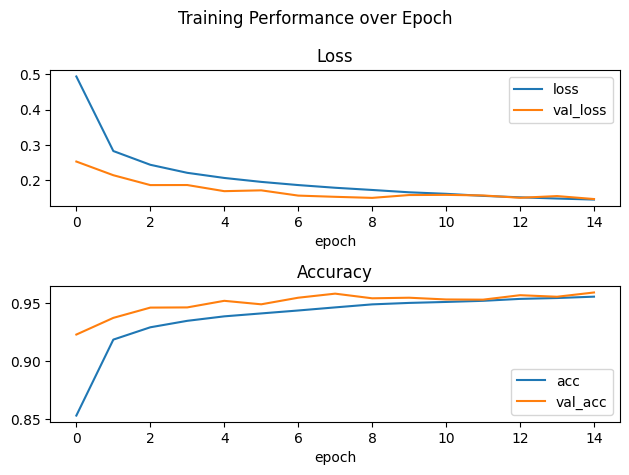

In [72]:
# Task 8: Evaluate the neural network on the testing data
# use model.evaluate to get the test loss and test accuracy

# plot loss change in training
plt.subplot(2, 1, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.title('Loss')
plt.xlabel('epoch')

# plot accuracy change in training
plt.subplot(2, 1, 2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['acc', 'val_acc'])
plt.title('Accuracy')
plt.xlabel('epoch')

plt.suptitle('Training Performance over Epoch')
plt.tight_layout()

# evaluate trained model with test data
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.2f}")
print(f"Test Accuracy: {accuracy:.2%}")

In [107]:
# Task 9: Define a simple linear regression model using PyTorch
# create a class LinearRegression that inherits from nn.Module
# define the constructor and forward function

# prepare the training and testing datasets
data = pd.read_csv('exp_vs_salary_Data.csv')
train, test = train_test_split(data, test_size=0.2)
# convert training data into tensors
X_train = tc.Tensor([[x] for x in list(train.YearsExperience)])
y_train = tc.FloatTensor([[x] for x in list(train.Salary)])
# convert testing data into tensors
X_test = tc.Tensor([[x] for x in list(test.YearsExperience)])
y_test = tc.FloatTensor([[x] for x in list(test.Salary)])

# define the linear regression model
class LinearRegression(tc.nn.Module):
    # define constructor function
    def __init__(self, in_size, out_size):
        super().__init__()  # inherit from parent class
        self.linear = tc.nn.Linear(in_features=in_size, out_features=out_size)
    # define forward function
    def forward(self, X):
        pred = self.linear(X)
        return(pred)

In [109]:
# Task 10: Train the linear regression model on some dummy data and print the weight and bias
# create an instance of LinearRegression
# use nn.MSELoss as criterion, optim.SGD as optimizer
# use model.parameters() as input for optimizer
# use optimizer.step() and criterion to update the model weight and bias

model = LinearRegression(1, 1)  # create an instance of class
[weight, bias] = model.parameters()  # print initial weights and biases
print(f"The initial parameters are: weight {weight.item():.2f}; bias {bias.item():.2f}.")

loss_fun = tc.nn.MSELoss()  # define MSE loss function
optimizer = tc.optim.SGD(model.parameters(), lr=0.01)  # define SGD optimizer with learning rate

epochs = 50  # define number of epochs
losses = []  # initiate list for losses

# train the linear regression model
for i in tqdm.trange(1, epochs + 1):  # repeat for given epochs

    y_pred = model.forward(X_train)  # generate prediction
    loss = loss_fun(y_pred, y_train)  # calculate loss
    print(f"Epoch {i}/{epochs} - loss: {loss.item()}")  # print current loss
    losses.append(loss)  # record loss

    optimizer.zero_grad()  # reset gradients
    loss.backward()  # compute gradients
    optimizer.step()  # update parameters with gradients

# print optimized weights and biases
[weight, bias] = model.parameters()
print(f"The optimized parameters are: weight {weight.item():.2f}; bias {bias.item():.2f}.")

The initial parameters are: weight -0.73; bias 0.58.


100%|██████████| 50/50 [00:00<00:00, 11636.62it/s]

Epoch 1/50 - loss: 5828349952.0
Epoch 2/50 - loss: 927003968.0
Epoch 3/50 - loss: 248123728.0
Epoch 4/50 - loss: 153457584.0
Epoch 5/50 - loss: 139627664.0
Epoch 6/50 - loss: 136987984.0
Epoch 7/50 - loss: 135902464.0
Epoch 8/50 - loss: 135037936.0
Epoch 9/50 - loss: 134209784.0
Epoch 10/50 - loss: 133392440.0
Epoch 11/50 - loss: 132582336.0
Epoch 12/50 - loss: 131778952.0
Epoch 13/50 - loss: 130982168.0
Epoch 14/50 - loss: 130191872.0
Epoch 15/50 - loss: 129408088.0
Epoch 16/50 - loss: 128630664.0
Epoch 17/50 - loss: 127859584.0
Epoch 18/50 - loss: 127094848.0
Epoch 19/50 - loss: 126336352.0
Epoch 20/50 - loss: 125584040.0
Epoch 21/50 - loss: 124837944.0
Epoch 22/50 - loss: 124097896.0
Epoch 23/50 - loss: 123363928.0
Epoch 24/50 - loss: 122635928.0
Epoch 25/50 - loss: 121913912.0
Epoch 26/50 - loss: 121197768.0
Epoch 27/50 - loss: 120487512.0
Epoch 28/50 - loss: 119783048.0
Epoch 29/50 - loss: 119084352.0
Epoch 30/50 - loss: 118391328.0
Epoch 31/50 - loss: 117704056.0
Epoch 32/50 - lo

# Bonus

In [ ]:
# Bonus Task: Implement a Convolutional Neural Network to classify the CIFAR-10 dataset
# use torchvision.datasets.CIFAR10 to load the dataset
# create a class CNN that inherit from nn.Module
# define the constructor, forward function and the network architecture 
# use CrossEntropyLoss as criterion, optim.SGD as optimizer
# use model.parameters() as input for optimizer
# use optimizer.step() and criterion to update the model weight and bias

In [181]:
# preparing data

# load cifar10 dataset

transform = tv.transforms.Compose(
    [tv.transforms.ToTensor(),
     tv.transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

trainset = tv.datasets.CIFAR10(root='data/', train=True, transform=transform)
trainloader = tc.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True)
testset = tv.datasets.CIFAR10(root='data/', train=False, transform=transform)
testloader = tc.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False)

In [182]:
# create CNN class

# define cnn model
class CNN(tc.nn.Module):

    # define constructor function
    def __init__(self):
        super(CNN, self).__init__()

        # convolution 1
        self.cnn1 = tc.nn.Conv2d(in_channels=3, out_channels=6, kernel_size=5)
        self.relu1 = tc.nn.ReLU()

        # max pool 1
        self.pool = tc.nn.MaxPool2d(kernel_size=2)

        # convolution 2
        self.cnn2 = tc.nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5)
        self.relu2 = tc.nn.ReLU()

        # # max pool 2
        # self.maxpool2 = tc.nn.MaxPool2d(kernel_size=2)

        # fully connected 1, 2, 3
        self.fc1 = tc.nn.Linear(16 * 5 * 5, 120)
        self.fc2 = tc.nn.Linear(120, 84)
        self.fc3 = tc.nn.Linear(84, 10)

    # define forward function
    def forward(self, x):

        # convolution and max pool
        x = self.pool(tc.nn.functional.relu(self.cnn1(x)))
        x = self.pool(tc.nn.functional.relu(self.cnn2(x)))

        # flatten all dimensions except batch
        x = tc.flatten(x, 1)

        # linear function
        x = tc.nn.functional.relu(self.fc1(x))
        x = tc.nn.functional.relu(self.fc2(x))
        x = self.fc3(x)
        
        return x

In [183]:
# instantiate cnn model class
model = CNN()

# instantiate loss class
criterion = tc.nn.CrossEntropyLoss()

# instantiate optimizer class with parameters as input
optimizer = tc.optim.SGD(model.parameters(), lr=0.01)

In [184]:
# train cnn model

epochs = 20  # define training epochs

for epoch in tqdm.trange(1, epochs + 1):

    running_loss = 0  # initiate local loss
    for i, (images, labels) in enumerate(trainloader, 0):
    
        # load training images
        images = images.requires_grad_()

        # generate prediction by forward pass
        outputs = model(images)

        # reset gradients w.r.t. parameters
        optimizer.zero_grad()

        # calculate loss: softmax -> cross entropy loss
        loss = criterion(outputs, labels)

        # compute gradients w.r.t. parameters
        loss.backward()

        # update parameters
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 500 mini-batches
            print(f"Epoch {epoch}/{epochs}, Batch{i + 1:6d}] - loss: {running_loss / 2000:.2f}")
            running_loss = 0.0

  0%|          | 0/20 [00:00<?, ?it/s]

Epoch 1/20, Batch  2000] - loss: 2.20
Epoch 1/20, Batch  4000] - loss: 1.88
Epoch 1/20, Batch  6000] - loss: 1.68
Epoch 1/20, Batch  8000] - loss: 1.59
Epoch 1/20, Batch 10000] - loss: 1.51
Epoch 1/20, Batch 12000] - loss: 1.47


  5%|▌         | 1/20 [00:21<06:47, 21.46s/it]

Epoch 2/20, Batch  2000] - loss: 1.39
Epoch 2/20, Batch  4000] - loss: 1.35
Epoch 2/20, Batch  6000] - loss: 1.32
Epoch 2/20, Batch  8000] - loss: 1.32
Epoch 2/20, Batch 10000] - loss: 1.28
Epoch 2/20, Batch 12000] - loss: 1.28


 10%|█         | 2/20 [00:42<06:23, 21.30s/it]

Epoch 3/20, Batch  2000] - loss: 1.21
Epoch 3/20, Batch  4000] - loss: 1.20
Epoch 3/20, Batch  6000] - loss: 1.23
Epoch 3/20, Batch  8000] - loss: 1.20
Epoch 3/20, Batch 10000] - loss: 1.20
Epoch 3/20, Batch 12000] - loss: 1.17


 15%|█▌        | 3/20 [01:06<06:24, 22.63s/it]

Epoch 4/20, Batch  2000] - loss: 1.11
Epoch 4/20, Batch  4000] - loss: 1.12
Epoch 4/20, Batch  6000] - loss: 1.12
Epoch 4/20, Batch  8000] - loss: 1.11
Epoch 4/20, Batch 10000] - loss: 1.10
Epoch 4/20, Batch 12000] - loss: 1.12


 20%|██        | 4/20 [01:33<06:27, 24.23s/it]

Epoch 5/20, Batch  2000] - loss: 1.02
Epoch 5/20, Batch  4000] - loss: 1.02
Epoch 5/20, Batch  6000] - loss: 1.06
Epoch 5/20, Batch  8000] - loss: 1.06
Epoch 5/20, Batch 10000] - loss: 1.03
Epoch 5/20, Batch 12000] - loss: 1.06


 25%|██▌       | 5/20 [01:56<05:54, 23.62s/it]

Epoch 6/20, Batch  2000] - loss: 0.97
Epoch 6/20, Batch  4000] - loss: 0.97
Epoch 6/20, Batch  6000] - loss: 0.99
Epoch 6/20, Batch  8000] - loss: 0.96
Epoch 6/20, Batch 10000] - loss: 1.00
Epoch 6/20, Batch 12000] - loss: 0.99


 30%|███       | 6/20 [02:16<05:16, 22.58s/it]

Epoch 7/20, Batch  2000] - loss: 0.89
Epoch 7/20, Batch  4000] - loss: 0.92
Epoch 7/20, Batch  6000] - loss: 0.95
Epoch 7/20, Batch  8000] - loss: 0.94
Epoch 7/20, Batch 10000] - loss: 0.95
Epoch 7/20, Batch 12000] - loss: 0.95


 35%|███▌      | 7/20 [02:37<04:46, 22.00s/it]

Epoch 8/20, Batch  2000] - loss: 0.85
Epoch 8/20, Batch  4000] - loss: 0.90
Epoch 8/20, Batch  6000] - loss: 0.88
Epoch 8/20, Batch  8000] - loss: 0.89
Epoch 8/20, Batch 10000] - loss: 0.91
Epoch 8/20, Batch 12000] - loss: 0.91


 40%|████      | 8/20 [02:58<04:20, 21.68s/it]

Epoch 9/20, Batch  2000] - loss: 0.80
Epoch 9/20, Batch  4000] - loss: 0.84
Epoch 9/20, Batch  6000] - loss: 0.85
Epoch 9/20, Batch  8000] - loss: 0.88
Epoch 9/20, Batch 10000] - loss: 0.90
Epoch 9/20, Batch 12000] - loss: 0.90


 45%|████▌     | 9/20 [03:19<03:56, 21.54s/it]

Epoch 10/20, Batch  2000] - loss: 0.81
Epoch 10/20, Batch  4000] - loss: 0.81
Epoch 10/20, Batch  6000] - loss: 0.83
Epoch 10/20, Batch  8000] - loss: 0.84
Epoch 10/20, Batch 10000] - loss: 0.83
Epoch 10/20, Batch 12000] - loss: 0.87


 50%|█████     | 10/20 [03:41<03:37, 21.78s/it]

Epoch 11/20, Batch  2000] - loss: 0.75
Epoch 11/20, Batch  4000] - loss: 0.81
Epoch 11/20, Batch  6000] - loss: 0.80
Epoch 11/20, Batch  8000] - loss: 0.80
Epoch 11/20, Batch 10000] - loss: 0.83
Epoch 11/20, Batch 12000] - loss: 0.83


 55%|█████▌    | 11/20 [04:11<03:36, 24.09s/it]

Epoch 12/20, Batch  2000] - loss: 0.74
Epoch 12/20, Batch  4000] - loss: 0.74
Epoch 12/20, Batch  6000] - loss: 0.79
Epoch 12/20, Batch  8000] - loss: 0.80
Epoch 12/20, Batch 10000] - loss: 0.81
Epoch 12/20, Batch 12000] - loss: 0.82


 60%|██████    | 12/20 [04:33<03:06, 23.36s/it]

Epoch 13/20, Batch  2000] - loss: 0.69
Epoch 13/20, Batch  4000] - loss: 0.76
Epoch 13/20, Batch  6000] - loss: 0.76
Epoch 13/20, Batch  8000] - loss: 0.77
Epoch 13/20, Batch 10000] - loss: 0.80
Epoch 13/20, Batch 12000] - loss: 0.78


 65%|██████▌   | 13/20 [04:54<02:38, 22.64s/it]

Epoch 14/20, Batch  2000] - loss: 0.69
Epoch 14/20, Batch  4000] - loss: 0.73
Epoch 14/20, Batch  6000] - loss: 0.73
Epoch 14/20, Batch  8000] - loss: 0.73
Epoch 14/20, Batch 10000] - loss: 0.77
Epoch 14/20, Batch 12000] - loss: 0.81


 70%|███████   | 14/20 [05:14<02:12, 22.00s/it]

Epoch 15/20, Batch  2000] - loss: 0.65
Epoch 15/20, Batch  4000] - loss: 0.69
Epoch 15/20, Batch  6000] - loss: 0.72
Epoch 15/20, Batch  8000] - loss: 0.75
Epoch 15/20, Batch 10000] - loss: 0.76
Epoch 15/20, Batch 12000] - loss: 0.76


 75%|███████▌  | 15/20 [05:35<01:48, 21.71s/it]

Epoch 16/20, Batch  2000] - loss: 0.65
Epoch 16/20, Batch  4000] - loss: 0.67
Epoch 16/20, Batch  6000] - loss: 0.70
Epoch 16/20, Batch  8000] - loss: 0.72
Epoch 16/20, Batch 10000] - loss: 0.75
Epoch 16/20, Batch 12000] - loss: 0.75


 80%|████████  | 16/20 [05:56<01:26, 21.56s/it]

Epoch 17/20, Batch  2000] - loss: 0.64
Epoch 17/20, Batch  4000] - loss: 0.65
Epoch 17/20, Batch  6000] - loss: 0.68
Epoch 17/20, Batch  8000] - loss: 0.72
Epoch 17/20, Batch 10000] - loss: 0.74
Epoch 17/20, Batch 12000] - loss: 0.72


 85%|████████▌ | 17/20 [06:17<01:04, 21.44s/it]

Epoch 18/20, Batch  2000] - loss: 0.63
Epoch 18/20, Batch  4000] - loss: 0.67
Epoch 18/20, Batch  6000] - loss: 0.70
Epoch 18/20, Batch  8000] - loss: 0.70
Epoch 18/20, Batch 10000] - loss: 0.71
Epoch 18/20, Batch 12000] - loss: 0.73


 90%|█████████ | 18/20 [06:40<00:43, 21.79s/it]

Epoch 19/20, Batch  2000] - loss: 0.61
Epoch 19/20, Batch  4000] - loss: 0.64
Epoch 19/20, Batch  6000] - loss: 0.67
Epoch 19/20, Batch  8000] - loss: 0.67
Epoch 19/20, Batch 10000] - loss: 0.69
Epoch 19/20, Batch 12000] - loss: 0.74


 95%|█████████▌| 19/20 [07:02<00:21, 21.90s/it]

Epoch 20/20, Batch  2000] - loss: 0.61
Epoch 20/20, Batch  4000] - loss: 0.64
Epoch 20/20, Batch  6000] - loss: 0.66
Epoch 20/20, Batch  8000] - loss: 0.68
Epoch 20/20, Batch 10000] - loss: 0.67
Epoch 20/20, Batch 12000] - loss: 0.72


100%|██████████| 20/20 [07:23<00:00, 22.18s/it]


In [186]:
# evaluate cnn model

# instantiate model class for training
model = CNN()

with tc.no_grad():

    correct = 0  # number of correctly categorized
    total = 0  # number of categorized in total
    for images, labels in testloader:
        
        # run images to calculate outputs
        outputs = model(images)

        # pick class with highest energy as prediction
        _, predicted = tc.max(outputs.data, 1)

        # update stats
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"Accuracy of the network on the 10000 test images: {100 * correct // total} %")

Accuracy of the network on the 10000 test images: 10 %


: 